In [184]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib as plt 
import  csv
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from model_code import run_model

from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn import tree
from sklearn import metrics


from sklearn.metrics import accuracy_score


import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
from sklearn.metrics import plot_confusion_matrix

from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from imblearn.pipeline import Pipeline as IMBPipeline

from imblearn.over_sampling import SMOTE

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [185]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head(10)


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,33,Government Sector,Yes,800000,3,0,Yes,No,0


In [186]:
y = df.pop('TravelInsurance')
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42)


EDA

In [187]:
#for col in df.columns:
   # df[col] = (df[col] - min(df[col]))/ (max(df[col]) - min(df[col]))

In [188]:
y.value_counts(normalize=True)

0    0.642677
1    0.357323
Name: TravelInsurance, dtype: float64

In [189]:
df['Age'].value_counts(normalize=True)

28    0.254655
34    0.133870
31    0.117765
29    0.096628
33    0.074484
26    0.074484
25    0.073478
27    0.065929
32    0.045798
30    0.032713
35    0.030196
Name: Age, dtype: float64

In [190]:
#for col in df:
   # print(col.value_counts)

In [191]:
df['AnnualIncome'].value_counts(ascending=True)

1650000      2
1800000      4
1550000      5
1750000     15
450000      15
950000      21
650000      30
1450000     31
1700000     37
1350000     43
850000      55
350000      55
1000000     60
400000      65
750000      65
1250000     71
900000      72
1150000     79
550000      81
1500000     82
1050000     82
300000      88
1300000     91
700000      95
600000      98
1100000    107
1200000    112
1400000    130
500000     143
800000     153
Name: AnnualIncome, dtype: int64

In [192]:
df['Employment Type'].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

In [193]:
df['GraduateOrNot'].value_counts(normalize=True)

Yes    0.851535
No     0.148465
Name: GraduateOrNot, dtype: float64

In [194]:
df['FamilyMembers'].value_counts()

4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64

In [195]:
df['ChronicDiseases'].value_counts()

0    1435
1     552
Name: ChronicDiseases, dtype: int64

In [196]:
df['FamilyMembers'].value_counts()

4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64

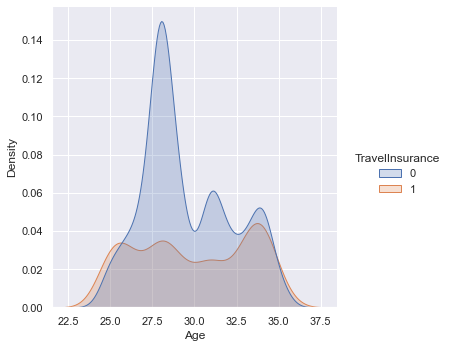

In [197]:
sns.displot(data=df, x='Age', hue=y, kind='kde', fill=True)


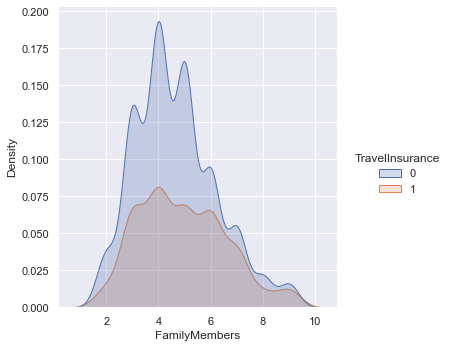

In [198]:
sns.displot(data=df, x='FamilyMembers', hue=y, kind='kde', fill=True)

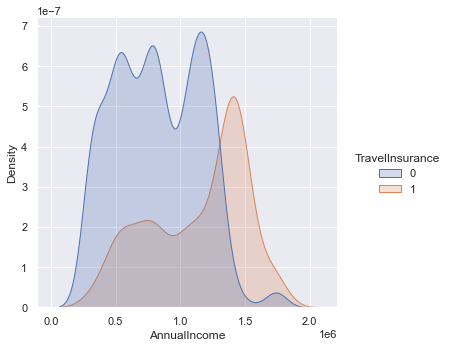

In [199]:
sns.displot(data=df, x='AnnualIncome', hue=y, kind='kde', fill=True)

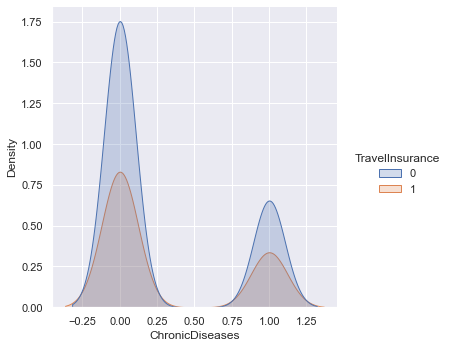

In [200]:
sns.displot(data=df, x='ChronicDiseases', hue=y, kind='kde', fill=True)

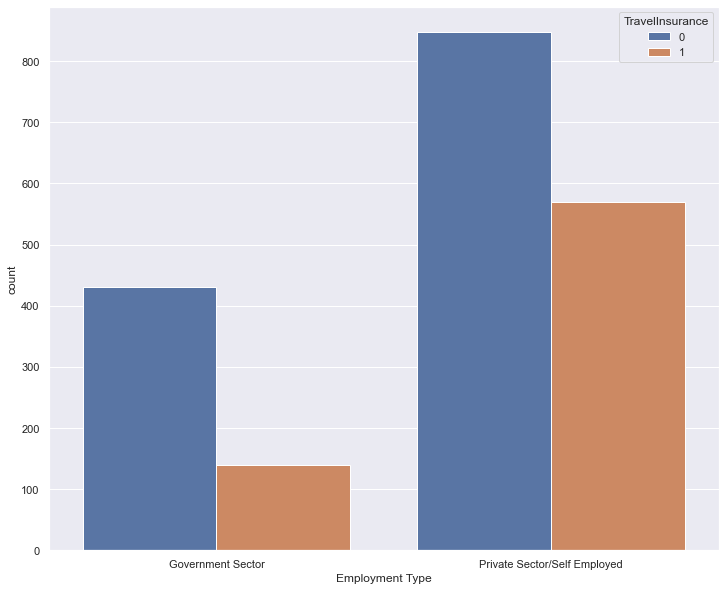

In [201]:
sns.countplot(data=df, x="Employment Type", hue=y);

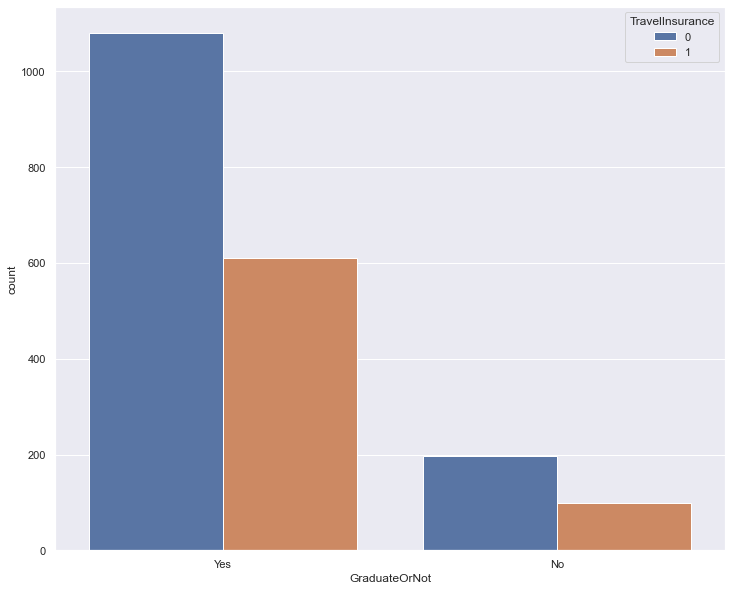

In [202]:
sns.countplot(data=df, x="GraduateOrNot", hue=y);

<AxesSubplot:xlabel='FrequentFlyer', ylabel='count'>

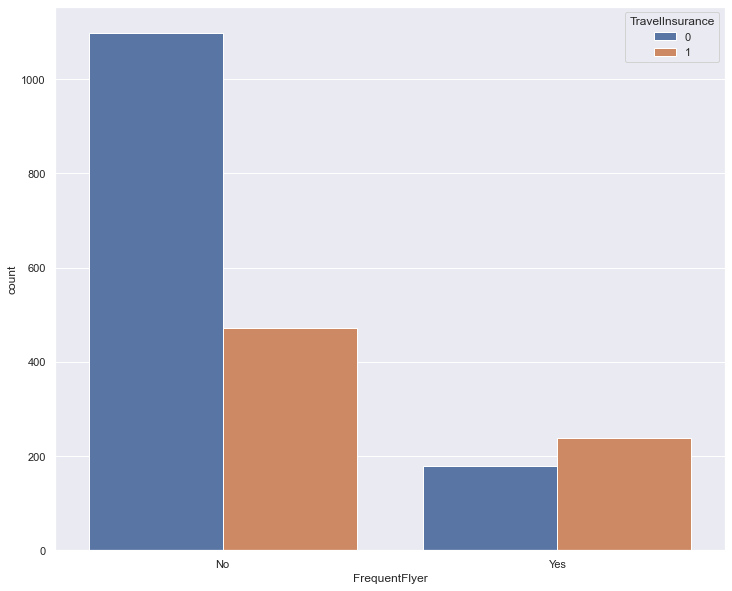

In [203]:
sns.countplot(data=df, x="FrequentFlyer", hue=y)

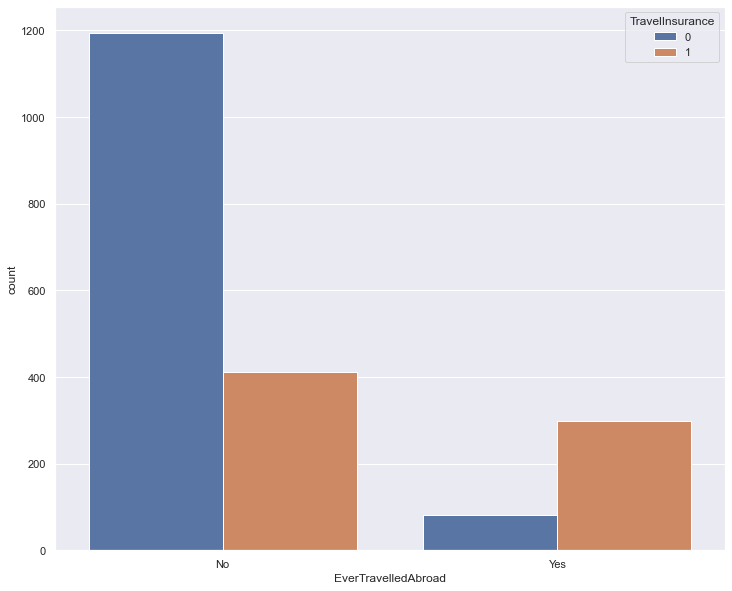

In [204]:
sns.countplot(data=df, x="EverTravelledAbroad", hue=y);

In [205]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)    
    cnf_matrix_test = confusion_matrix(y_test,  y_pred_test)

    print('Confusion Matrix for Test Set:\n', cnf_matrix_test)
   
    cnf_matrix_train = confusion_matrix(y_train,  y_pred_train)
    print('Confusion Matrix for Train Set:\n', cnf_matrix_train)
 
    print('Classification Report for Test Set:\n',classification_report(y_test , y_pred_test))
    print('Classification Report for Train Set:\n',classification_report(y_train, y_pred_train))
    
    plot_confusion_matrix(model, X_test, y_test,
                     cmap=plt.cm.Blues)
    plot_confusion_matrix(model, X_train, y_train,
                     cmap=plt.cm.Blues)
    
   
    return model 

In [206]:
#X_train_nums=X_train.select_dtypes('float64')
#X_train_cat = X_train.select_dtypes('object')

Confusion Matrix for Test Set:
 [[225  32]
 [ 51  90]]
Confusion Matrix for Train Set:
 [[858 162]
 [191 378]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.82      0.88      0.84       257
           1       0.74      0.64      0.68       141

    accuracy                           0.79       398
   macro avg       0.78      0.76      0.76       398
weighted avg       0.79      0.79      0.79       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1020
           1       0.70      0.66      0.68       569

    accuracy                           0.78      1589
   macro avg       0.76      0.75      0.76      1589
weighted avg       0.78      0.78      0.78      1589



Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False)),
                ('ss', StandardScaler()), ('smote', SMOTE()),
                ('lr', LogisticRegression())])

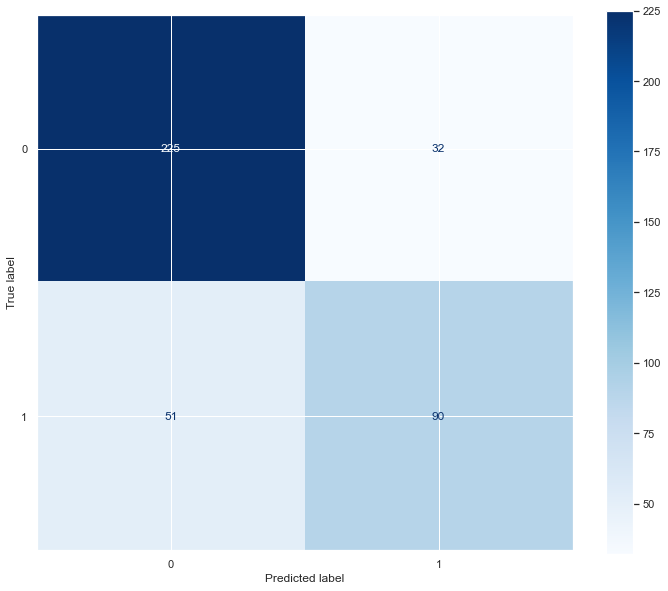

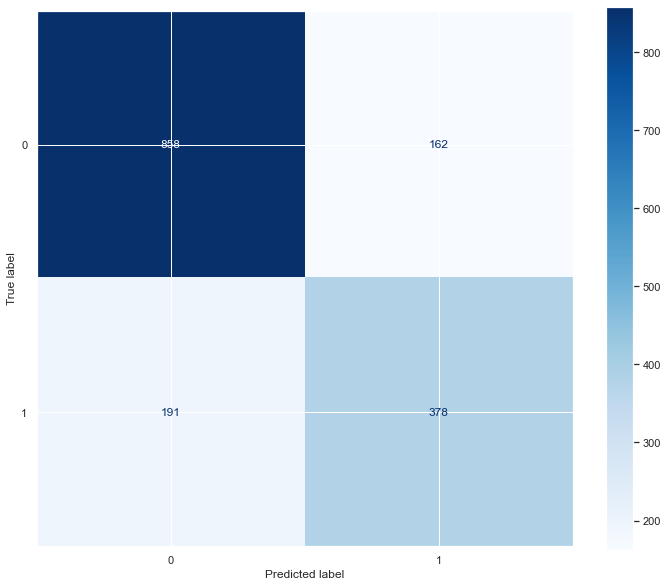

In [260]:
numerical_pipeline = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False)),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression())
])

run_model(numerical_pipeline, X_train, X_test, y_train, y_test)                
#categorical_pipeline = Pipeline(steps=[
   # ('ohe', OneHotEncoder(drop='first',
                         #sparse=False))
#])

#trans = ColumnTransformer(transformers=[
    #('numerical', numerical_pipeline, X_train_nums.columns),
    #('categorical', categorical_pipeline, X_train_cat.columns)
#])
#full_pipeline = IMBPipeline([('trans', trans), ('smote', SMOTE())])

baseline models 

In [236]:
base_model_pipe_lr = Pipeline(steps=[
    ('pipe', numerical_pipeline),
    ('lr', LogisticRegression())
])
run_model(base_model_pipe_lr, X_train, X_test, y_train, y_test)

ValueError: too many values to unpack (expected 2)

Confusion Matrix for Test Set:
 [[240  17]
 [ 91  50]]
Confusion Matrix for Train Set:
 [[978  42]
 [344 225]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       257
           1       0.75      0.35      0.48       141

    accuracy                           0.73       398
   macro avg       0.74      0.64      0.65       398
weighted avg       0.73      0.73      0.70       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84      1020
           1       0.84      0.40      0.54       569

    accuracy                           0.76      1589
   macro avg       0.79      0.68      0.69      1589
weighted avg       0.78      0.76      0.73      1589



Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object'))])),
                ('knn', KNeighborsClassifier())])

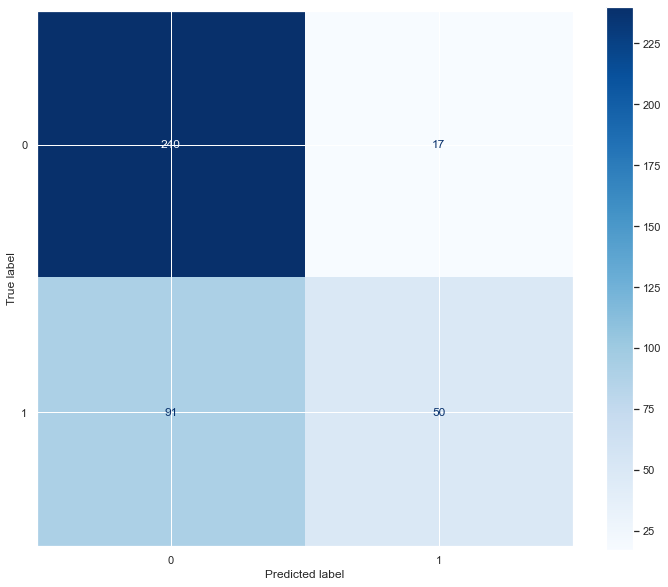

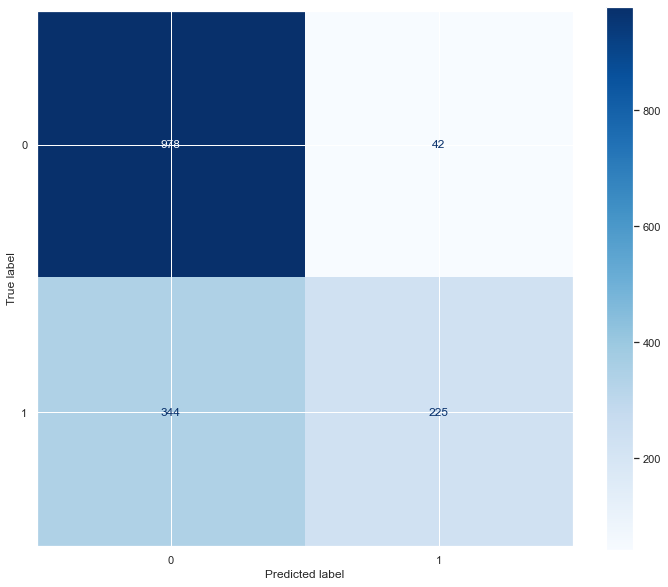

In [88]:
base_model_pipe_knn = Pipeline(steps=[
    ('trans', trans),
    ('knn', KNeighborsClassifier())
])
run_model(base_model_pipe_knn, X_train, X_test, y_train, y_test)



Confusion Matrix for Test Set:
 [[215  42]
 [ 72  69]]
Confusion Matrix for Train Set:
 [[876 144]
 [294 275]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       257
           1       0.62      0.49      0.55       141

    accuracy                           0.71       398
   macro avg       0.69      0.66      0.67       398
weighted avg       0.70      0.71      0.70       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80      1020
           1       0.66      0.48      0.56       569

    accuracy                           0.72      1589
   macro avg       0.70      0.67      0.68      1589
weighted avg       0.72      0.72      0.71      1589



Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object'))])),
                ('nb', GaussianNB())])

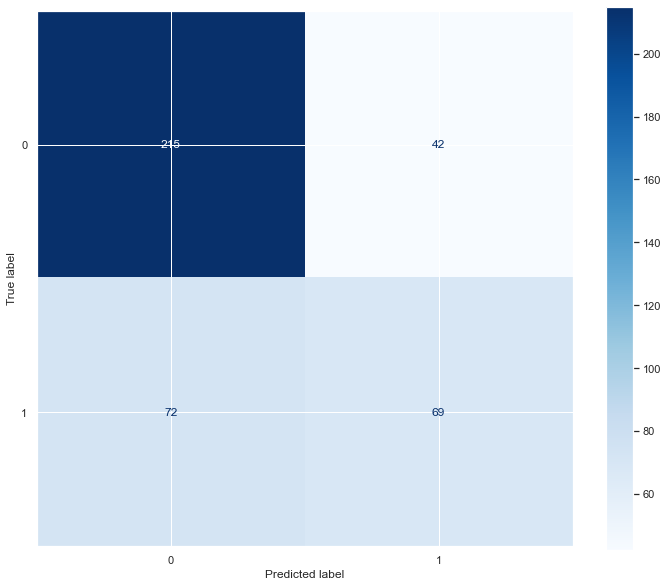

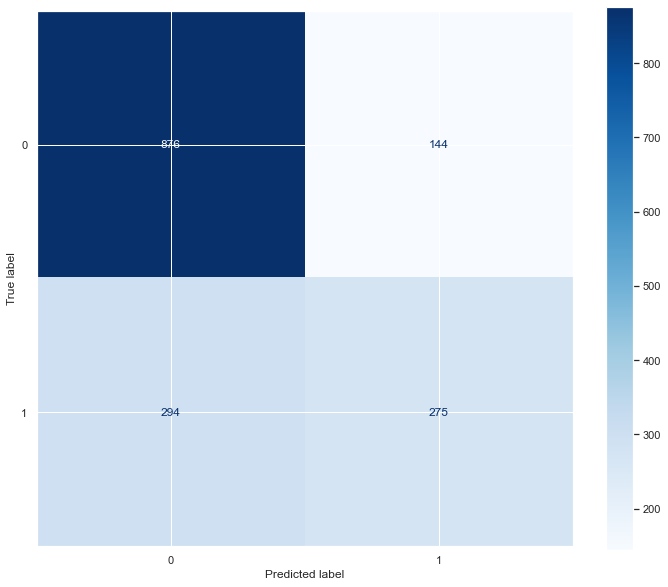

In [89]:
base_model_pipe_nb = Pipeline(steps=[
    ('trans', trans),
    ('nb', GaussianNB())
])
run_model(base_model_pipe_nb, X_train, X_test, y_train, y_test)

Confusion Matrix for Test Set:
 [[240  17]
 [ 91  50]]
Confusion Matrix for Train Set:
 [[978  42]
 [344 225]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       257
           1       0.75      0.35      0.48       141

    accuracy                           0.73       398
   macro avg       0.74      0.64      0.65       398
weighted avg       0.73      0.73      0.70       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84      1020
           1       0.84      0.40      0.54       569

    accuracy                           0.76      1589
   macro avg       0.79      0.68      0.69      1589
weighted avg       0.78      0.76      0.73      1589



Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object'))])),
                ('dt', DecisionTreeClassifier())])

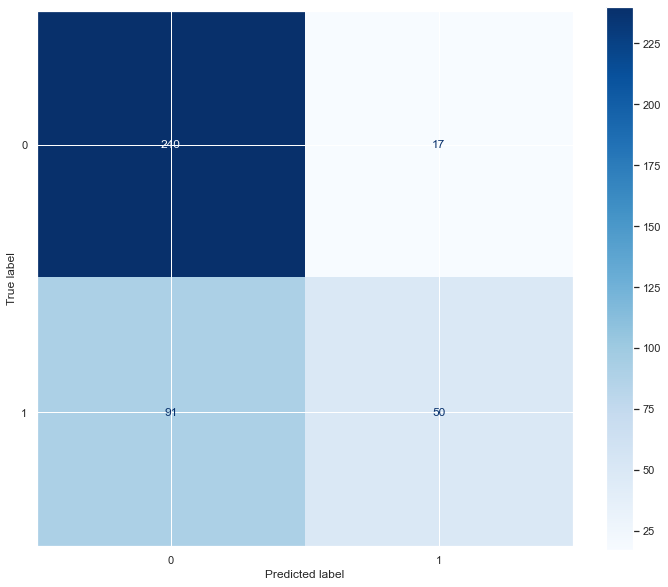

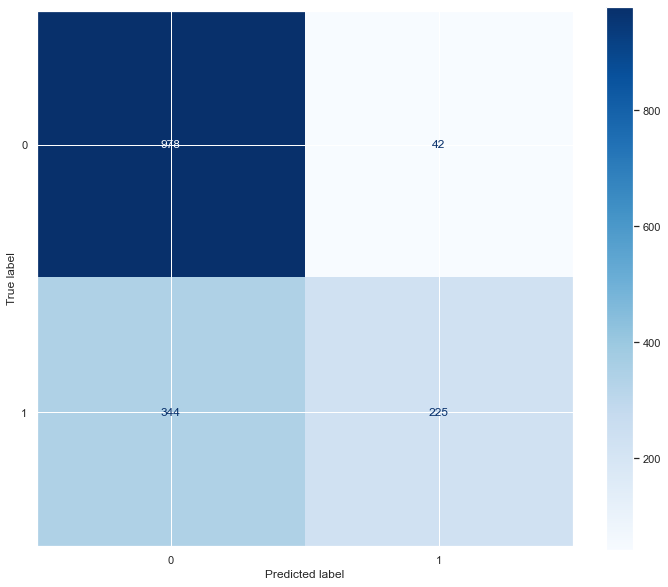

In [90]:
base_model_pipe_dt = Pipeline(steps=[
    ('trans', trans),
    ('dt', DecisionTreeClassifier())
])
run_model(base_model_pipe_dt, X_train, X_test, y_train, y_test)

Confusion Matrix for Test Set:
 [[240  17]
 [ 91  50]]
Confusion Matrix for Train Set:
 [[978  42]
 [344 225]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       257
           1       0.75      0.35      0.48       141

    accuracy                           0.73       398
   macro avg       0.74      0.64      0.65       398
weighted avg       0.73      0.73      0.70       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84      1020
           1       0.84      0.40      0.54       569

    accuracy                           0.76      1589
   macro avg       0.79      0.68      0.69      1589
weighted avg       0.78      0.76      0.73      1589



Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

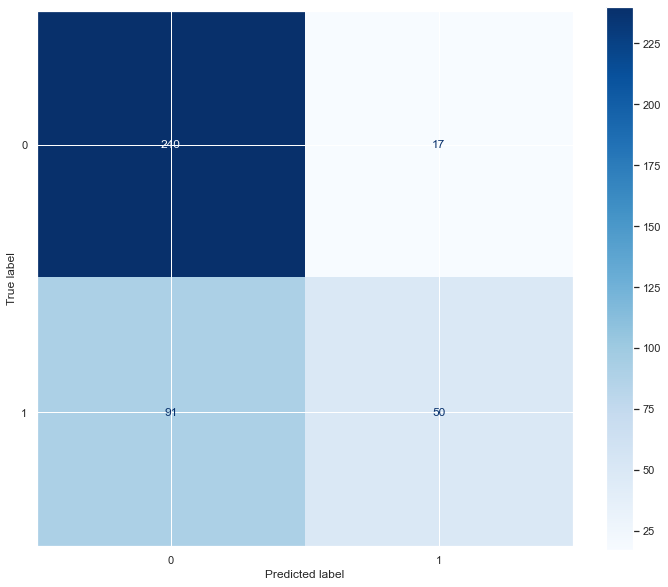

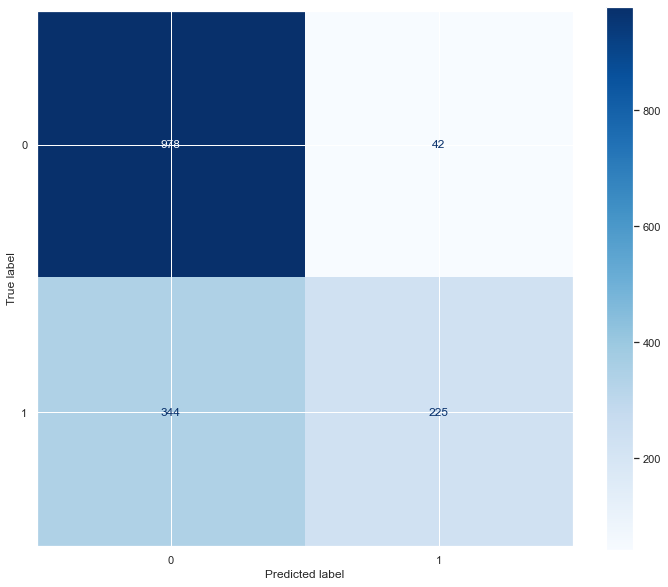

In [91]:
base_model_pipe_rf = Pipeline(steps=[
    ('trans', trans),
    ('rf', RandomForestClassifier())
])
run_model(base_model_pipe_rf, X_train, X_test, y_train, y_test)

[09:09:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix for Test Set:
 [[240  17]
 [ 91  50]]
Confusion Matrix for Train Set:
 [[978  42]
 [344 225]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       257
           1       0.75      0.35      0.48       141

    accuracy                           0.73       398
   macro avg       0.74      0.64      0.65       398
weighted avg       0.73      0.73      0.70       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84      1020
           1       0.84      0.40      0.54       569

    accuracy                           0.76      1589
   macro avg     

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object'))])),
                ('xg',
                 XGBClassifier(base_score=...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               

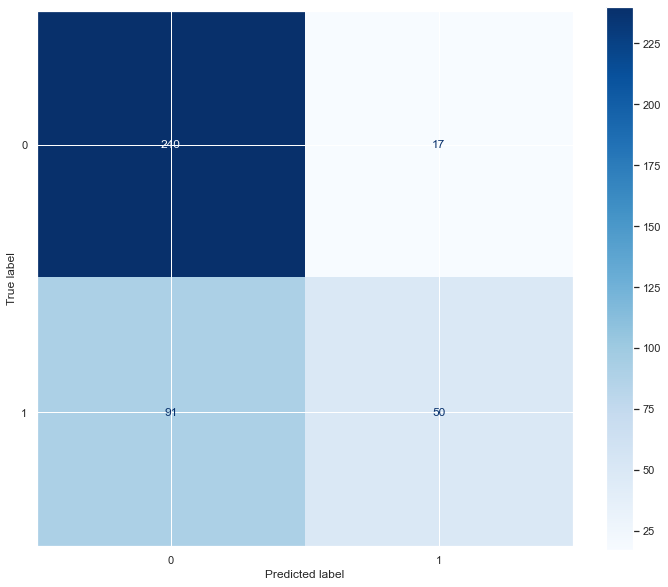

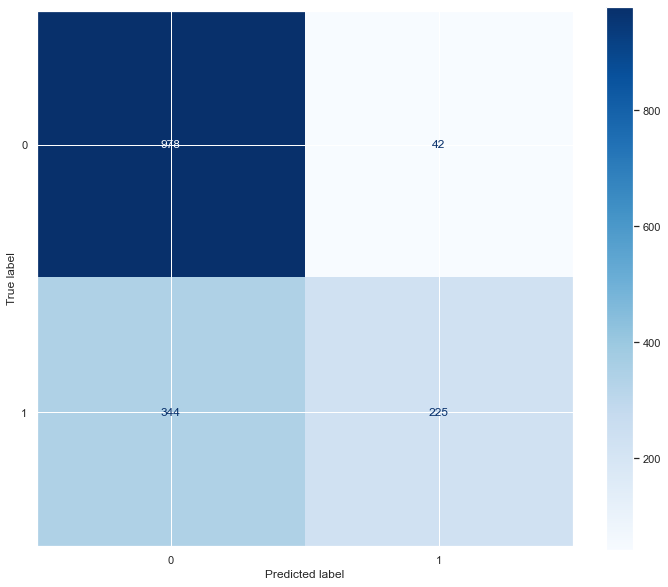

In [92]:
base_model_pipe_xg = Pipeline(steps=[
    ('trans', trans),
    ('xg', XGBClassifier())
])
run_model(base_model_pipe_xg, X_train, X_test, y_train, y_test)

GridSearch Models 

Confusion Matrix for Test Set:
 [[238  19]
 [ 82  59]]
Confusion Matrix for Train Set:
 [[957  63]
 [330 239]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82       257
           1       0.76      0.42      0.54       141

    accuracy                           0.75       398
   macro avg       0.75      0.67      0.68       398
weighted avg       0.75      0.75      0.72       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      1020
           1       0.79      0.42      0.55       569

    accuracy                           0.75      1589
   macro avg       0.77      0.68      0.69      1589
weighted avg       0.76      0.75      0.73      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index([], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         Index(['Employment Type', 'GraduateOrNot

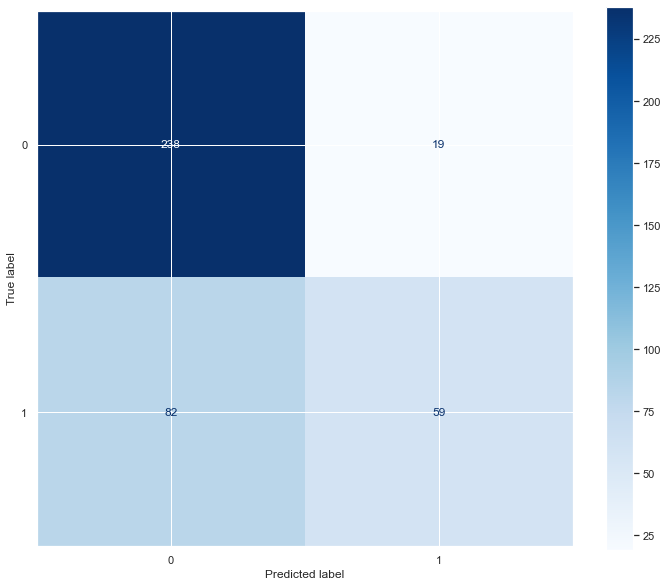

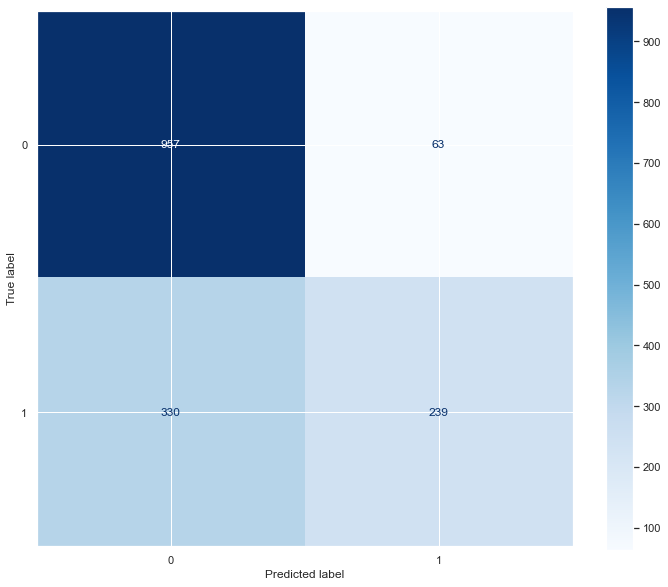

In [93]:
model_pipe_lr = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression())
])
pipe_grid_lr = {'lr__C': (0.01, 0.1, 1, 10),
    'lr__fit_intercept': (True, False)}

gs_pipe_lr = GridSearchCV(estimator=model_pipe_lr, param_grid=pipe_grid_lr,cv=5)
run_model(gs_pipe_lr, X_train, X_test, y_train, y_test)

Confusion Matrix for Test Set:
 [[240  17]
 [ 86  55]]
Confusion Matrix for Train Set:
 [[970  50]
 [336 233]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82       257
           1       0.76      0.39      0.52       141

    accuracy                           0.74       398
   macro avg       0.75      0.66      0.67       398
weighted avg       0.75      0.74      0.71       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83      1020
           1       0.82      0.41      0.55       569

    accuracy                           0.76      1589
   macro avg       0.78      0.68      0.69      1589
weighted avg       0.77      0.76      0.73      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index([], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         Index(['Employment Type', 'GraduateOrNot

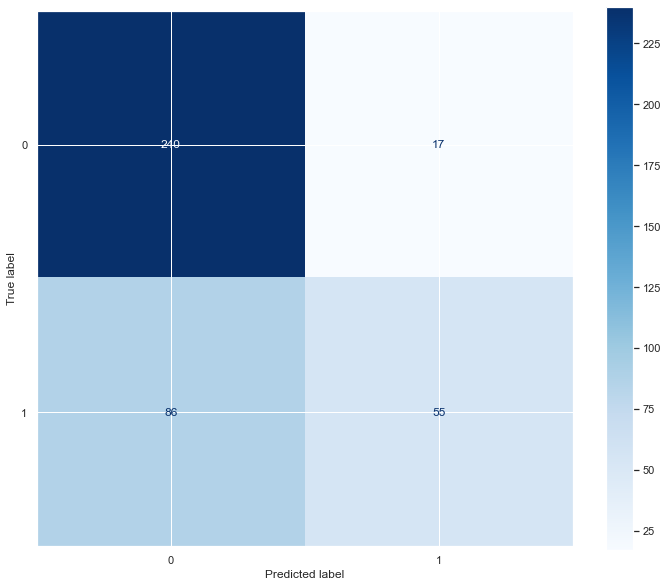

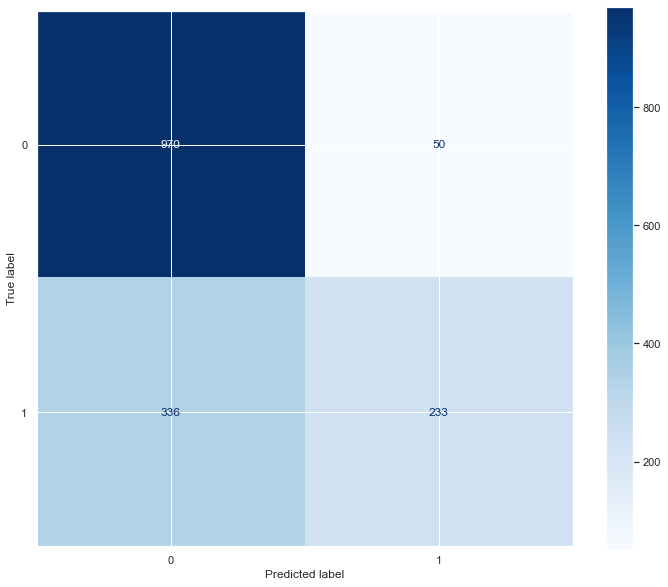

In [94]:
model_pipe_knn = Pipeline(steps=[
    ('trans', trans),
    ('knn', KNeighborsClassifier())
])
pipe_grid_knn = {'knn__n_neighbors': [3, 5, 7], 'knn__p': [1, 2, 3]}

gs_pipe_knn = GridSearchCV(estimator=model_pipe_knn, param_grid=pipe_grid_knn,cv=5)
run_model(gs_pipe_knn, X_train, X_test, y_train, y_test)

Confusion Matrix for Test Set:
 [[240  17]
 [ 91  50]]
Confusion Matrix for Train Set:
 [[978  42]
 [344 225]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       257
           1       0.75      0.35      0.48       141

    accuracy                           0.73       398
   macro avg       0.74      0.64      0.65       398
weighted avg       0.73      0.73      0.70       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84      1020
           1       0.84      0.40      0.54       569

    accuracy                           0.76      1589
   macro avg       0.79      0.68      0.69      1589
weighted avg       0.78      0.76      0.73      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index([], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         Index(['Employment Type', 'GraduateOrNot

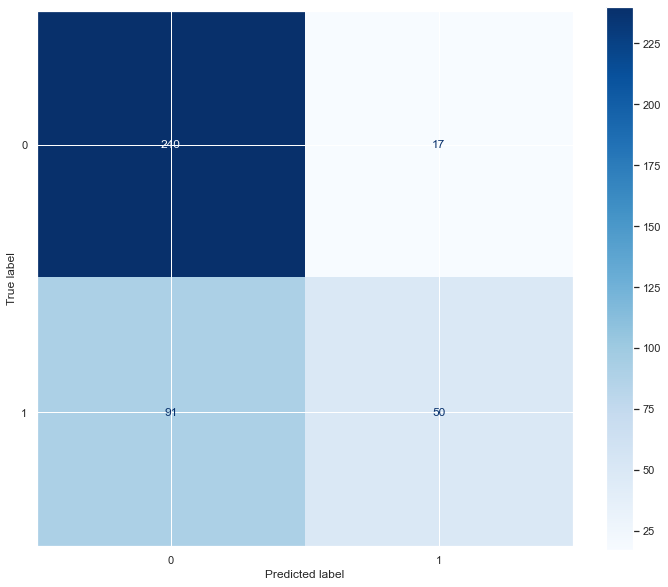

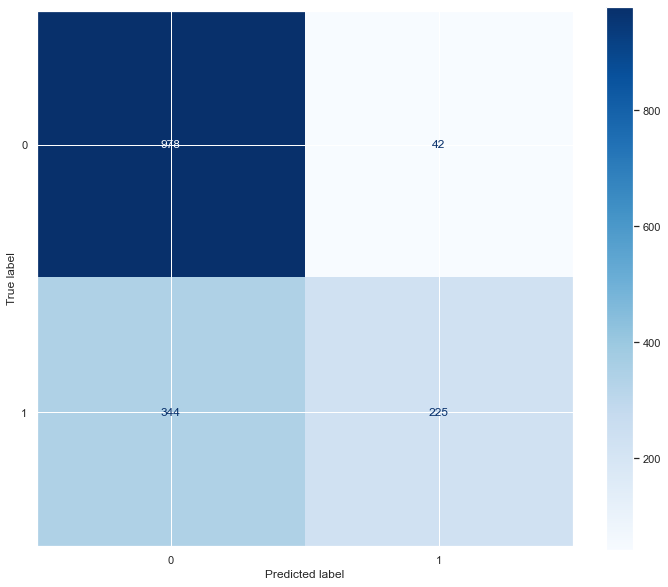

In [95]:
model_pipe_dt = Pipeline(steps=[
    ('trans', trans),
    ('dt', DecisionTreeClassifier())
])
pipe_grid_dt = {'dt__max_depth': [None, 2, 6, 10], 'dt__min_samples_split': [5, 10]}

gs_pipe_dt = GridSearchCV(estimator=model_pipe_dt, param_grid=pipe_grid_dt,cv=5)
run_model(gs_pipe_dt, X_train, X_test, y_train, y_test)


In [150]:
model_pipe_rf = Pipeline(steps=[
    ('trans', trans),
    ('rf', RandomForestClassifier())
])
pipe_grid_rf = {'rf__n_estimators': [4, 6, 9], 
              'rf__max_features': ['log2', 'sqrt','auto'],
              'rf__criterion': ['entropy', 'gini'], 
              'rf__max_depth': [2, 3, 5, 10], 
              'rf__min_samples_split': [2, 3, 5],
              'rf__min_samples_leaf': [1,5,8] }

gs_pipe_rf = GridSearchCV(estimator=model_pipe_rf, param_grid=pipe_grid_rf,cv=5)
run_model(gs_pipe_rf, X_train, X_test, y_train, y_test)

NameError: name 'confusion_matrix' is not defined

Confusion Matrix for Test Set:
 [[240  17]
 [ 86  55]]
Confusion Matrix for Train Set:
 [[970  50]
 [336 233]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82       257
           1       0.76      0.39      0.52       141

    accuracy                           0.74       398
   macro avg       0.75      0.66      0.67       398
weighted avg       0.75      0.74      0.71       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83      1020
           1       0.82      0.41      0.55       569

    accuracy                           0.76      1589
   macro avg       0.78      0.68      0.69      1589
weighted avg       0.77      0.76      0.73      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index([], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         Index(['Employment Type', 'GraduateOrNot

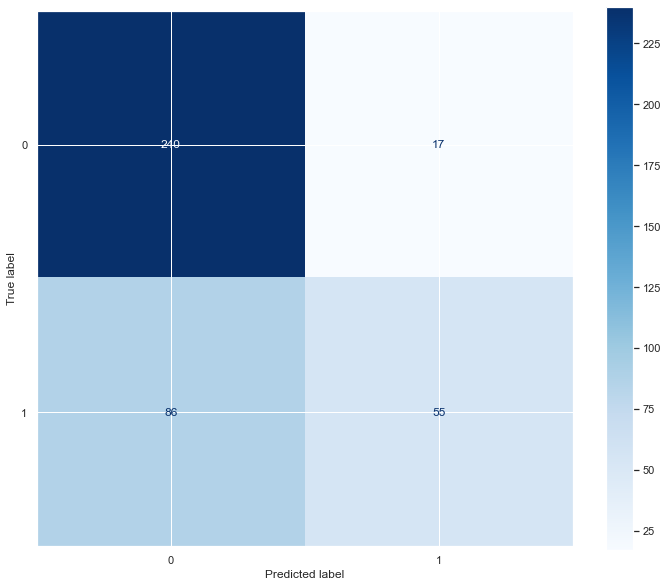

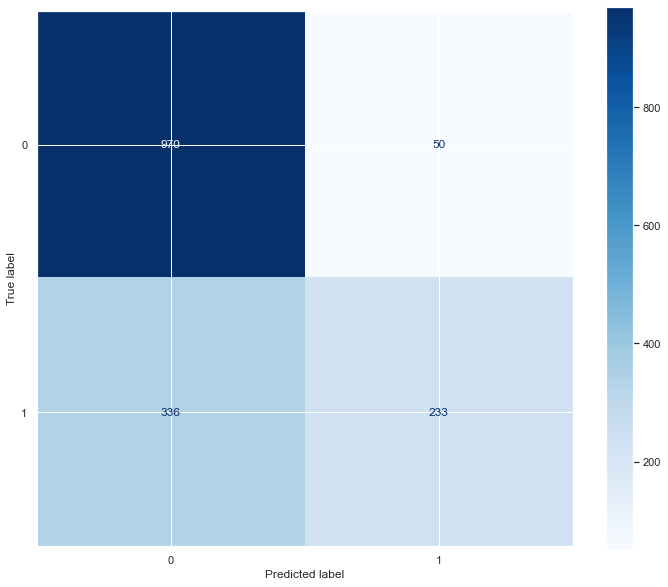

In [159]:
model_pipe_xg = Pipeline(steps=[
    ('trans', trans),
    ('xg', XGBClassifier(silent=True,verbosity=0))
])
pipe_grid_xg =  {'xg__booster': ['gbtree', 'gblinear'],
                 'xg__n__estimators': [100, 200, 500],
                'xg__learning__rate': [0.01,0.05,0.1],
                'xg__booster': ['gbtree', 'gblinear'],
                'xg__gamma': [0, 0.5, 1],
                'xg__reg__alpha': [0, 0.5, 1],
                'xg__reg__lambda': [0.5, 1, 5],
                'xg__base__score': [0.2, 0.5, 1]}

gs_pipe_xg = GridSearchCV(estimator=model_pipe_xg, param_grid=pipe_grid_xg,cv=5)
run_model(gs_pipe_xg, X_train, X_test, y_train, y_test)

In [261]:
gs_pipe_xg.named_steps['model_pipe_xg'].feature_importances_
list(zip(feature_importances_, X_train.columns))

AttributeError: 'GridSearchCV' object has no attribute 'named_steps'